In [40]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


# Load Image 





In [41]:
def read_img_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

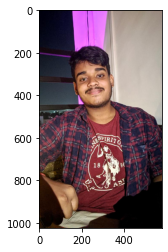

In [42]:
filename = 'img1.jpeg'
img = read_img_file(filename)

#Create Edge Mask using Open cv 

In [43]:
def edge_mask(img , line_size , blur_value ):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray , blur_value) 
  
  edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY ,line_size, blur_value )
  return edges 

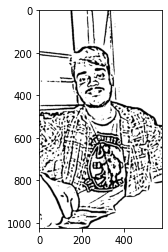

In [47]:
line_size = 19
blur_value = 7 
edges = edge_mask(img,line_size,blur_value)

plt.imshow(edges , cmap = 'gray')
plt.show()

## Reduce the COLOR palate 

In [48]:
def   color_quantization(img,k):
  #transform the existing image 
  data =  np.float32(img).reshape(-1,3)

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 20 ,0.001)

  ret , label , center = cv2.kmeans(data,k ,None , criteria , 10 , cv2.KMEANS_RANDOM_CENTERS )
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result 

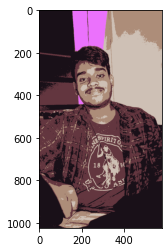

In [49]:
img_quantize = color_quantization(img,k=5)
plt.imshow(img_quantize)
plt.show()

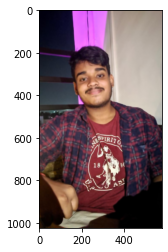

In [50]:
blurred = cv2.bilateralFilter(img , d = 9 , sigmaColor = 200 , sigmaSpace = 200) 
plt.imshow(blurred)
plt.show()

#Combine Edge Mask with quantize img 


In [53]:
def cartoon():
  c = cv2.bitwise_and(blurred, blurred , mask = edges )

  plt.imshow(c)
  plt.title('cartoonified Image')
  plt.show()

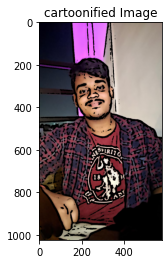

In [54]:
cartoon()